In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import math




In [3]:



gender_data=pd.read_csv('Genderdata.csv')
gender_data.head(66)

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M


In [4]:
gender_data=pd.read_csv('Genderdata.csv')
gender_data.head(10)

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
5,Warm,Jazz/Blues,Doesn't drink,Fanta,F
6,Cool,Pop,Beer,Coca Cola/Pepsi,F
7,Warm,Pop,Whiskey,Fanta,F
8,Warm,Rock,Other,7UP/Sprite,F
9,Neutral,Pop,Wine,Coca Cola/Pepsi,F


In [5]:

gender_data.tail(10)

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
56,Warm,Folk/Traditional,Other,Fanta,M
57,Warm,Electronic,Vodka,Fanta,M
58,Warm,Jazz/Blues,Vodka,Coca Cola/Pepsi,M
59,Cool,Pop,Whiskey,Other,M
60,Cool,Electronic,Whiskey,Coca Cola/Pepsi,M
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M
65,Cool,Electronic,Beer,Coca Cola/Pepsi,M


## ANALYSING THE DATA SET


<AxesSubplot:xlabel='Gender', ylabel='count'>

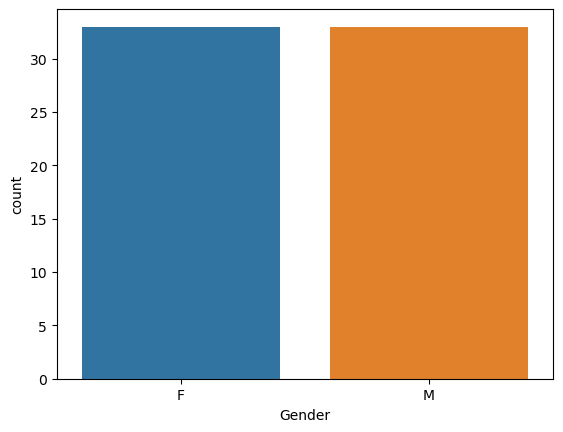

In [6]:
sns.countplot(x='Gender',data=gender_data)

<AxesSubplot:xlabel='Favorite Color', ylabel='count'>

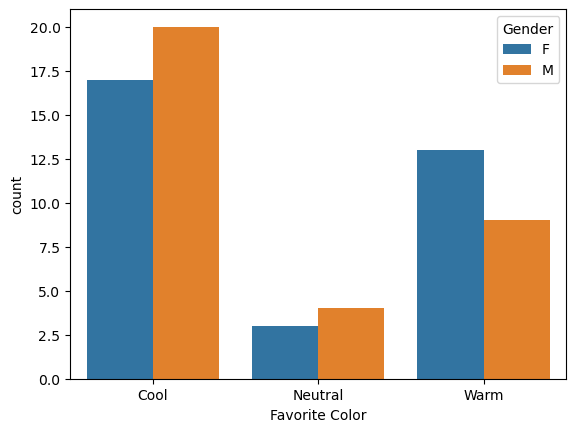

In [7]:
sns.countplot(x="Favorite Color",hue="Gender",data=gender_data)

In [8]:
gender_data['Favorite Color'].value_counts()

Cool       37
Warm       22
Neutral     7
Name: Favorite Color, dtype: int64

<AxesSubplot:xlabel='Favorite Music Genre', ylabel='count'>

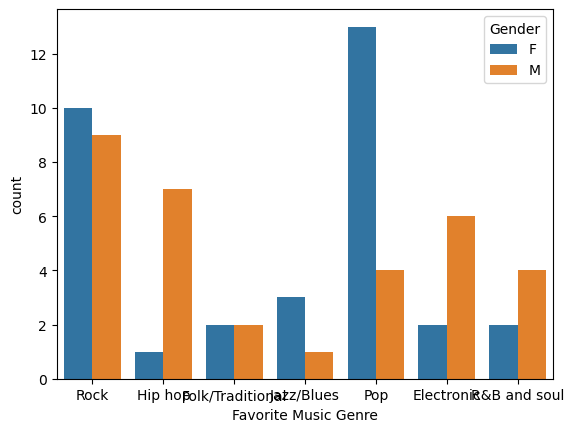

In [9]:
sns.countplot(x="Favorite Music Genre", hue="Gender", data=gender_data)

<AxesSubplot:xlabel='Favorite Beverage', ylabel='count'>

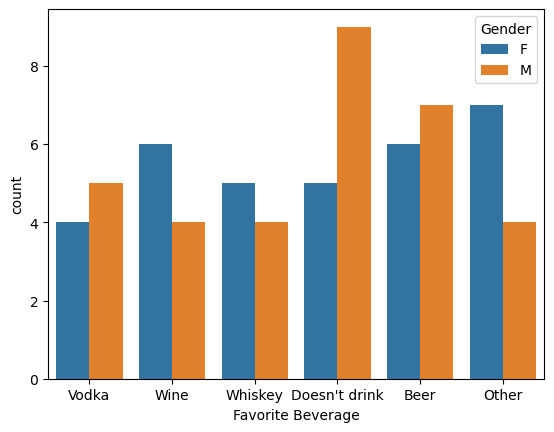

In [10]:
sns.countplot(x="Favorite Beverage", hue="Gender", data=gender_data)

<AxesSubplot:xlabel='Favorite Soft Drink', ylabel='count'>

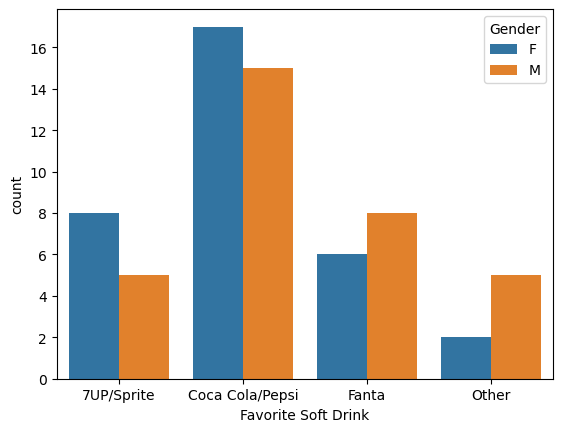

In [11]:





sns.countplot(x="Favorite Soft Drink", hue="Gender", data=gender_data)

In [12]:
pd.DataFrame(gender_data.groupby('Gender')['Favorite Music Genre'].value_counts())

Favorite Music Genre
Gender Favorite Music Genre                      
F      Pop                                     13
       Rock                                    10
       Jazz/Blues                               3
       Electronic                               2
       Folk/Traditional                         2
       R&B and soul                             2
       Hip hop                                  1
M      Rock                                     9
       Hip hop                                  7
       Electronic                               6
       Pop                                      4
       R&B and soul                             4
       Folk/Traditional                         2
       Jazz/Blues                               1

In [13]:
gender_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


<AxesSubplot:xlabel='Favorite Soft Drink', ylabel='count'>

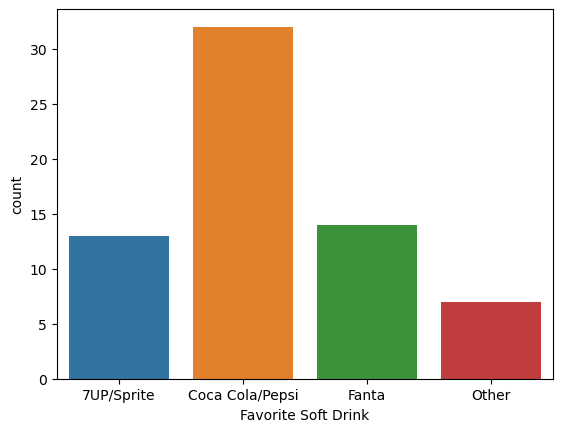

In [14]:
sns.countplot(x="Favorite Soft Drink",  data=gender_data)


## DATA CLEANING

In [15]:
gender_data.isnull()#if the data write true then missing data exists ,so far it brought false so no missing data

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
61,False,False,False,False,False
62,False,False,False,False,False
63,False,False,False,False,False
64,False,False,False,False,False


In [16]:
gender_data.isnull().sum()#found the whlw sum of the data to check for missing values_ no missing values

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

In [17]:
gender_data.head(6)#dropped the first 6 data to chceck if missing existed i wouuld have dropped the data

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
5,Warm,Jazz/Blues,Doesn't drink,Fanta,F


<AxesSubplot:>

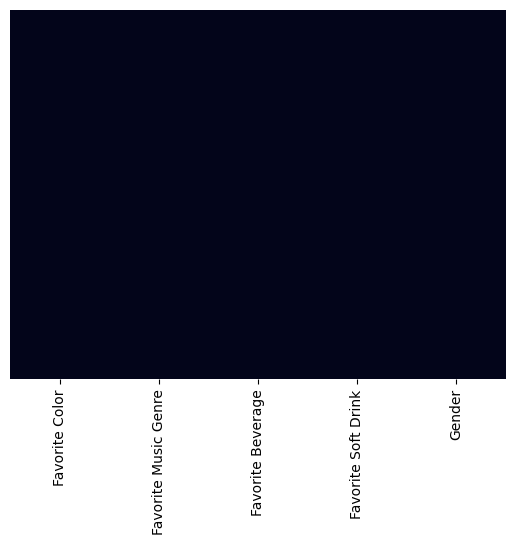

In [18]:
sns.heatmap(gender_data.isnull(),yticklabels=False,cbar=False)#i checked if missing data was avaialable 

In [19]:
gender_data.isnull().sum#confirmed no missing data of such

<bound method NDFrame._add_numeric_operations.<locals>.sum of     Favorite Color  Favorite Music Genre  Favorite Beverage  \
0            False                 False              False   
1            False                 False              False   
2            False                 False              False   
3            False                 False              False   
4            False                 False              False   
..             ...                   ...                ...   
61           False                 False              False   
62           False                 False              False   
63           False                 False              False   
64           False                 False              False   
65           False                 False              False   

    Favorite Soft Drink  Gender  
0                 False   False  
1                 False   False  
2                 False   False  
3                 False   False  
4          

In [20]:
gender_data.isnull().sum()#another confirmation no missing data

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

In [21]:
gender_data.head(3)

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F


In [22]:
## Encode the data to numerical form so i will use label encoder

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
fav_music=gender_data.copy()
L_encoder=LabelEncoder()
fav_music['Favorite Music Genre']=L_encoder.fit_transform(fav_music['Favorite Music Genre'])
fav_music.head(2)

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,6,Vodka,7UP/Sprite,F
1,Neutral,2,Vodka,Coca Cola/Pepsi,F


In [25]:
#from sklearn.model_selection import train_test_split

In [26]:
cols=list(gender_data.columns)
for col in cols:
    gender_data[col]=L_encoder.fit_transform(gender_data[col])
gender_data    

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,0,6,3,0,0
1,1,2,3,1,0
2,2,6,5,1,0
3,2,1,4,2,0
4,0,6,3,1,0
...,...,...,...,...,...
61,0,6,3,1,1
62,0,2,0,1,1
63,1,2,1,2,1
64,0,6,5,1,1


In [27]:
gender_data.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,0,6,3,0,0
1,1,2,3,1,0
2,2,6,5,1,0
3,2,1,4,2,0
4,0,6,3,1,0


## TRAIN MY DATA

In [28]:
X=gender_data.drop('Gender',axis=1)
Y=gender_data['Gender']

In [29]:
from sklearn.model_selection import train_test_split

In [78]:
 x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=10,shuffle=True)


In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
print('x train shape :',x_train.shape)
print('y train shape :',y_train.shape)
print('x test shape :',x_test.shape)
print('y test shape :',y_test.shape)

x train shape : (46, 4)
y train shape : (46,)
x test shape : (20, 4)
y test shape : (20,)


In [81]:
model1=LogisticRegression()

In [82]:
model1.fit(x_train, y_train)

LogisticRegression()

In [83]:
predictions=model1.predict(x_test)

In [84]:
from sklearn.metrics import classification_report

In [85]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.67      0.36      0.47        11\n           1       0.50      0.78      0.61         9\n\n    accuracy                           0.55        20\n   macro avg       0.58      0.57      0.54        20\nweighted avg       0.59      0.55      0.53        20\n'

In [86]:
from sklearn.metrics import confusion_matrix

In [87]:
confusion_matrix(y_test,predictions)

array([[4, 7],
       [2, 7]], dtype=int64)

In [88]:
from sklearn.metrics import accuracy_score

In [89]:
accuracy_score(y_test,predictions)

0.55